# Codigo 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import datetime
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from copy import deepcopy
%matplotlib inline
plt.style.use('ggplot')

# Filtrado y acomodo de datos

In [2]:
df = pd.read_excel('4WCVc1WH.xlsx')

copy = df.copy()

#Quitando los datos que no nos sirven
filas_a_conservar = [23, 17, 21, 20, 6]
copy = copy[copy.index.isin(filas_a_conservar)]


# Cambiar el primer valor de la fila 6 por "Fechas"
fila_a_cambiar = 6
nuevo_valor = "Fechas"
copy.loc[fila_a_cambiar, copy.columns[0]] = nuevo_valor

# Ajustando las fechas para que sean el nombre de las columnas
nuevas_columnas = copy.loc[6]
copy.columns = nuevas_columnas

copy = copy.drop(6)
copy = copy.T
columnas_ajustadas = copy.loc['Fechas']
copy.columns = columnas_ajustadas
copy = copy.drop('Fechas')

In [3]:
copy.index.get_level_values(0)

Index(['SEP '22', 'JUN '22', 'MAR '22', 'DEC '21', 'SEP '21', 'JUN '21',
       'MAR '21', 'DEC '20', 'SEP '20', 'JUN '20', 'MAR '20', 'DEC '19',
       'SEP '19', 'JUN '19', 'MAR '19', 'DEC '18', 'SEP '18', 'JUN '18',
       'MAR '18', 'DEC '17', 'SEP '17', 'JUN '17', 'MAR '17', 'DEC '16',
       'SEP '16', 'JUN '16', 'MAR '16', 'DEC '15', 'SEP '15', 'JUN '15',
       'MAR '15', 'DEC '14', 'SEP '14', 'JUN '14', 'MAR '14', 'DEC '13',
       'SEP '13', 'JUN '13', 'MAR '13', 'DEC '12', 'SEP '12', 'JUN '12',
       'MAR '12', 'DEC '11', 'SEP '11', 'JUN '11', 'MAR '11', 'DEC '10',
       'SEP '10', 'JUN '10', 'MAR '10', 'DEC '09', 'SEP '09', 'JUN '09',
       'MAR '09', 'DEC '08', 'SEP '08', 'JUN '08', 'MAR '08', 'DEC '07'],
      dtype='object', name=6)

In [4]:
copy.rename_axis(None, inplace=True)

<Axes: >

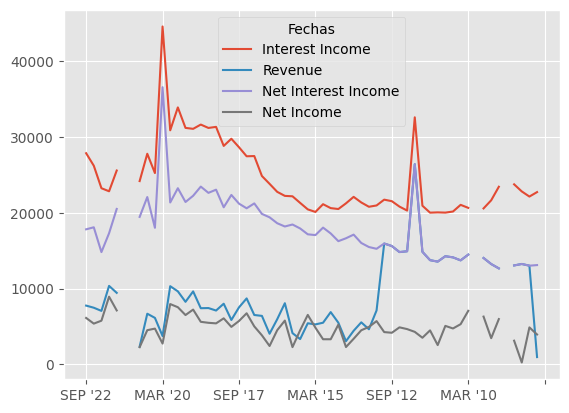

In [5]:
# copy = copy.T
copy.plot()

# Tratamiento de nulos

Graficamos los datos 

Creamos un date frame para las razones 

In [6]:
copy

Fechas,Interest Income,Revenue,Net Interest Income,Net Income
SEP '22,27852,7752,17814,6124
JUN '22,26206,7472,18082,5375
MAR '22,23236,7054,14811,5762
DEC '21,22832,10352,17297,8927
SEP '21,25569,9435,20502,7114
JUN '21,NaN,NaN,NaN,NaN
MAR '21,NaN,NaN,NaN,NaN
DEC '20,24177,2337,19451,2269
SEP '20,27780,6682,22070,4510
JUN '20,25235,6133,18018,4718


In [7]:
# Creando lags
lags = list(range(1, 6, 1)) 

lagged_frame = pd.DataFrame (data = None, columns = ['t'] + [f't-{d}' for d in lags])
lagged_frame['t'] = copy['Net Income'].values

Usamos el metodo shift de pandas para crear rezagos 

In [8]:
for lag in lags: 
    lagged_frame[f't-{lag}'] = lagged_frame['t'].shift(lag) 

lagged_frame.head()

,t,t-1,t-2,t-3,t-4,t-5
0,6124,None,None,None,None,None
1,5375,6124,None,None,None,None
2,5762,5375,6124,None,None,None
3,8927,5762,5375,6124,None,None
4,7114,8927,5762,5375,6124,None


Visualizacion de la serie rezagada 

<Axes: >

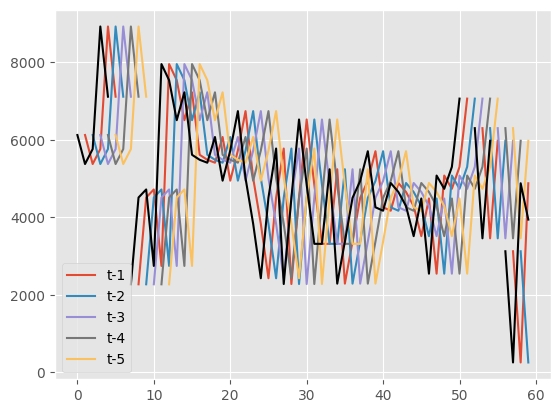

In [9]:
lag_names = [f't-{lag}' for lag in lags] 
lagged_frame[lag_names].plot()
lagged_frame['t'].plot(color = 'black')

Ahora nuestro DataFrame tiene "nuevas variables" que usaremos como predictores. Es decir, cada punto en $t$ se volverá una función de los puntos en $t-n, n>0$.


Dado a que el objetivo del modelo es **rellenar información**, podemos usar ambas partes de la gráfica.

In [10]:
lagged_copy = lagged_frame.copy()
lagged_copy2 = lagged_frame.copy()

lagged_copy.dropna(inplace = True)

In [11]:
modelo = LinearRegression()
response = ['t'] 

predictores = sorted(set(lagged_copy.columns).difference(response))
predictores

['t-1', 't-2', 't-3', 't-4', 't-5']

Ajustamos el modelo 

In [12]:
modelo.fit(lagged_copy[predictores], lagged_copy[response]) 

LinearRegression()

Veamos los coeficientes del modelo para saber los niveles de importancia

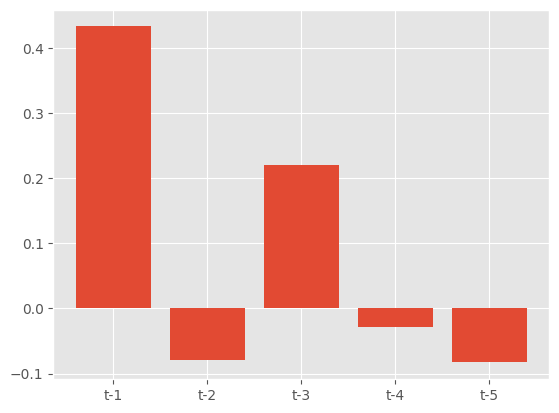

In [13]:
fig, ax = plt.subplots()
index = range(len(predictores) ) 
ax.bar(index, modelo.coef_[0])
ax.set_xticks(index)
ax.set_xticklabels(predictores)
plt.show()

Usamos el modelo para estimar los valores que nos faltan en la serie de tiempo

In [14]:
lagged_frame.loc[lagged_frame['t'].isnull()]

,t,t-1,t-2,t-3,t-4,t-5
5,NaN,7114,8927,5762,5375,6124
6,NaN,NaN,7114,8927,5762,5375
51,NaN,7064,5302,4735,5077,2543
55,NaN,5975,3456,6301,NaN,7064


In [15]:
df_to_estimate = lagged_frame.loc[lagged_frame['t'].isnull()].copy()
index_datos_a_estimar = df_to_estimate.index.tolist()
index_datos_a_estimar

[5, 6, 51, 55]

In [16]:
df_to_estimate

,t,t-1,t-2,t-3,t-4,t-5
5,NaN,7114,8927,5762,5375,6124
6,NaN,NaN,7114,8927,5762,5375
51,NaN,7064,5302,4735,5077,2543
55,NaN,5975,3456,6301,NaN,7064


Comenzemos por estimar el primer punto

In [17]:
estimaciones = [] 
primera_posicion = min(index_datos_a_estimar) 

#Se hace un reshape porque la libreria skit, trabaja mejor con columnas, ya que en algunos casos puede dar error 
values_reshape = df_to_estimate.loc[primera_posicion, predictores].values.reshape(1, -1)

values_reshape = np.array([x for x in values_reshape[0] if x is not None])

# Asegúrate de que el arreglo tenga dos dimensiones

# Asegúrate de que el arreglo tenga dos dimensiones
values_reshape = values_reshape.reshape(1, -1)
values_reshape
# values_reshape, values_reshape2

array([[7114, 8927, 5762, 5375, 6124]])

In [18]:
#El primer 0 me da un arreglo y el segundo me arroja el dato 
estimaciones.append(modelo.predict(values_reshape)[0][0])
estimaciones

/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[5571.634623014005]

In [19]:
# Colocando las respuestas en un copy 
lagged_copy2.loc[primera_posicion, 't'] = estimaciones[0]
lagged_copy2.loc[index_datos_a_estimar]

,t,t-1,t-2,t-3,t-4,t-5
5,5571.634623,7114,8927,5762,5375,6124
6,NaN,NaN,7114,8927,5762,5375
51,NaN,7064,5302,4735,5077,2543
55,NaN,5975,3456,6301,NaN,7064


In [20]:
for lag in lags: 
    lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)

In [21]:
lagged_copy2.loc[index_datos_a_estimar]

,t,t-1,t-2,t-3,t-4,t-5
5,5571.634623,7114,8927,5762,5375,6124
6,NaN,5571.634623,7114,8927,5762,5375
51,NaN,7064,5302,4735,5077,2543
55,NaN,5975,3456,6301,NaN,7064


In [22]:
for posicion, index in enumerate(index_datos_a_estimar[1:]):
    #Reshape 
    values_reshape = lagged_copy2.loc[index, predictores].values.reshape(1, - 1)

    #Estimacion 
    estimaciones.append(modelo.predict(values_reshape)[0][0])

    #Colocar estimaciones 
    lagged_copy2.loc[index, 't'] = estimaciones[posicion + 1]
    for lag in lags: 
        lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)


/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
lagged_copy2.loc[index_datos_a_estimar]

,t,t-1,t-2,t-3,t-4,t-5
5,5571.634623,7114,8927,5762,5375,6124
6,5797.200731,5571.634623,7114,8927,5762,5375
51,5914.136285,7064,5302,4735,5077,2543
55,5534.986851,5975,3456,6301,5914.136285,7064


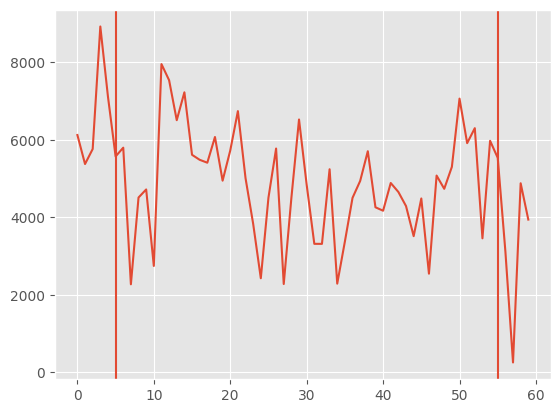

In [24]:
lagged_copy2['t'].plot()
plt.axvline(min(index_datos_a_estimar))
plt.axvline(max(index_datos_a_estimar))

# Acomodar predicciones en la tabla

In [25]:
datos_con_serie = lagged_copy2['t']
datos_con_serie

lista_net = []
datos_lista = list(datos_con_serie)
for i in range(len(datos_lista)):
    dato = datos_lista[i]
    dato = int(dato)
    lista_net.append(dato)


In [26]:
copy.shape

(60, 4)

<Axes: >

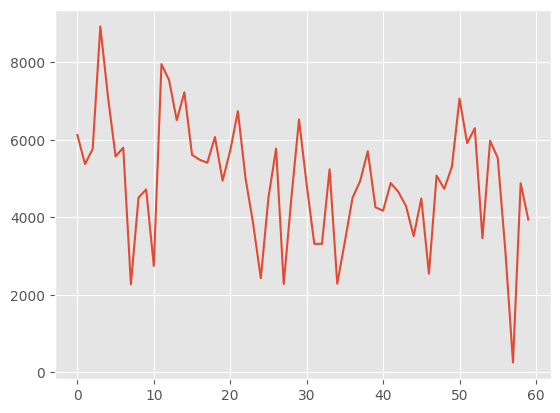

In [27]:
lagged_copy2['t'].plot()

In [28]:
datos_con_serie.shape

(60,)

In [29]:
# Enfoque 1: Utilizando el método pd.concat()
copy['Predicciones_Net_Income'] = lista_net
copy.head()

Fechas,Interest Income,Revenue,Net Interest Income,Net Income,Predicciones_Net_Income
SEP '22,27852,7752,17814,6124,6124
JUN '22,26206,7472,18082,5375,5375
MAR '22,23236,7054,14811,5762,5762
DEC '21,22832,10352,17297,8927,8927
SEP '21,25569,9435,20502,7114,7114


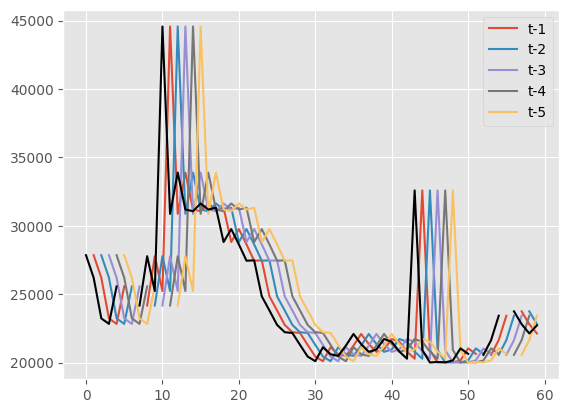

In [30]:
# Creando lags
lags = list(range(1, 6, 1)) 

lagged_frame = pd.DataFrame (data = None, columns = ['t'] + [f't-{d}' for d in lags])
lagged_frame['t'] = copy['Interest Income'].values

for lag in lags: 
    lagged_frame[f't-{lag}'] = lagged_frame['t'].shift(lag) 

lag_names = [f't-{lag}' for lag in lags] 
lagged_frame[lag_names].plot()
lagged_frame['t'].plot(color = 'black')

lagged_copy = lagged_frame.copy()
lagged_copy2 = lagged_frame.copy()

lagged_copy.dropna(inplace = True)

modelo = LinearRegression()
response = ['t'] 

predictores = sorted(set(lagged_copy.columns).difference(response))

modelo.fit(lagged_copy[predictores], lagged_copy[response]) 

lagged_frame.loc[lagged_frame['t'].isnull()]

df_to_estimate = lagged_frame.loc[lagged_frame['t'].isnull()].copy()
index_datos_a_estimar = df_to_estimate.index.tolist()



In [31]:
estimaciones = [] 
primera_posicion = min(index_datos_a_estimar) 

#Se hace un reshape porque la libreria skit, trabaja mejor con columnas, ya que en algunos casos puede dar error 
values_reshape = df_to_estimate.loc[primera_posicion, predictores].values.reshape(1, -1)

values_reshape = np.array([x for x in values_reshape[0] if x is not None])

# Asegúrate de que el arreglo tenga dos dimensiones

# Asegúrate de que el arreglo tenga dos dimensiones
values_reshape = values_reshape.reshape(1, -1)
values_reshape
# values_reshape, values_reshape2

array([[25569, 22832, 23236, 26206, 27852]])

/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


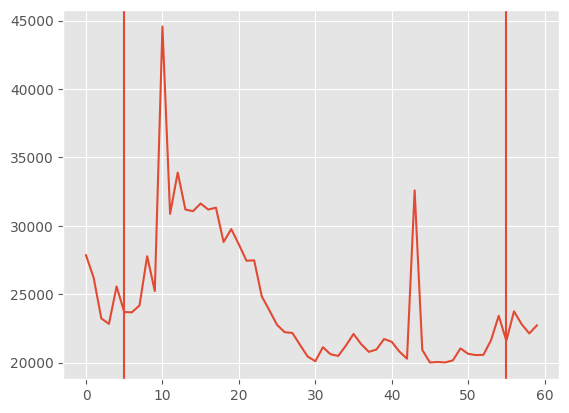

In [32]:
#El primer 0 me da un arreglo y el segundo me arroja el dato 
estimaciones.append(modelo.predict(values_reshape)[0][0])
# Colocando las respuestas en un copy 
lagged_copy2.loc[primera_posicion, 't'] = estimaciones[0]
lagged_copy2.loc[index_datos_a_estimar]
for lag in lags: 
    lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)
for posicion, index in enumerate(index_datos_a_estimar[1:]):
    #Reshape 
    values_reshape = lagged_copy2.loc[index, predictores].values.reshape(1, - 1)

    #Estimacion 
    estimaciones.append(modelo.predict(values_reshape)[0][0])

    #Colocar estimaciones 
    lagged_copy2.loc[index, 't'] = estimaciones[posicion + 1]
    for lag in lags: 
        lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)
lagged_copy2['t'].plot()
plt.axvline(min(index_datos_a_estimar))
plt.axvline(max(index_datos_a_estimar))

In [33]:
datos_con_serie = lagged_copy2['t']
datos_con_serie

lista_net2 = []
datos_lista = list(datos_con_serie)
for i in range(len(datos_lista)):
    dato = datos_lista[i]
    dato = int(dato)
    lista_net2.append(dato)

# Enfoque 1: Utilizando el método pd.concat()
copy['Predicciones Interest Income'] = lista_net2
copy.head()


Fechas,Interest Income,Revenue,Net Interest Income,Net Income,Predicciones_Net_Income,Predicciones Interest Income
SEP '22,27852,7752,17814,6124,6124,27852
JUN '22,26206,7472,18082,5375,5375,26206
MAR '22,23236,7054,14811,5762,5762,23236
DEC '21,22832,10352,17297,8927,8927,22832
SEP '21,25569,9435,20502,7114,7114,25569


# Hacer el Kernel 

In [34]:
data1 = copy['Predicciones_Net_Income']
data1 = data1.reset_index()
data1.index = range(1, len(data1) + 1) 
data1 = data1.drop(data1.columns[0], axis=1)
data1['Probabilidad'] = 1/60
data1['p_acumulada'] = data1['Probabilidad'].cumsum()
p = 1/len(data1['Probabilidad'])
p_acum = data1['p_acumulada'].tolist()
Predicciones_Net_Income = data1['Predicciones_Net_Income'].tolist()

In [35]:
data1

,Predicciones_Net_Income,Probabilidad,p_acumulada
1,6124,0.016667,0.016667
2,5375,0.016667,0.033333
3,5762,0.016667,0.050000
4,8927,0.016667,0.066667
5,7114,0.016667,0.083333
6,5571,0.016667,0.100000
7,5797,0.016667,0.116667
8,2269,0.016667,0.133333
9,4510,0.016667,0.150000
10,4718,0.016667,0.166667


array([[<Axes: title={'center': 'Predicciones_Net_Income'}>,
        <Axes: title={'center': 'Probabilidad'}>],
       [<Axes: title={'center': 'p_acumulada'}>, <Axes: >]], dtype=object)

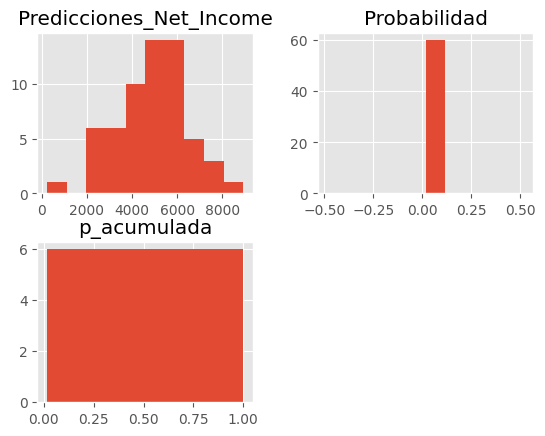

In [36]:
data1.hist()

In [37]:
data1.head()

,Predicciones_Net_Income,Probabilidad,p_acumulada
1,6124,0.016667,0.016667
2,5375,0.016667,0.033333
3,5762,0.016667,0.050000
4,8927,0.016667,0.066667
5,7114,0.016667,0.083333


In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

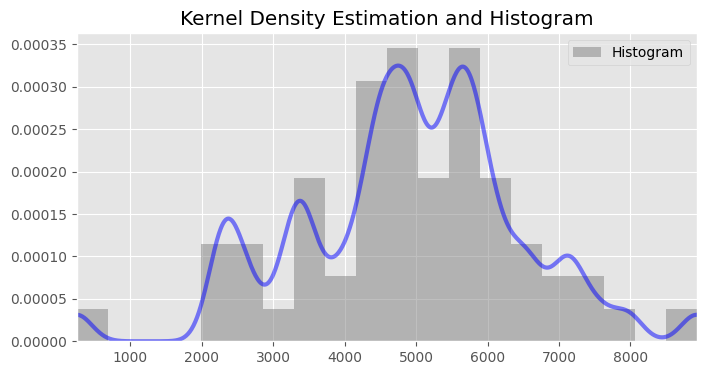

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Suponiendo que 'data1' es tu DataFrame de pandas con una sola columna
data = data1['Predicciones_Net_Income']  # Reemplaza 'nombre_de_la_columna' con el nombre de tu columna

# The grid we'll use for plotting
x_grid = np.linspace(data.min() - 1, data.max() + 1, 1000)

# Kernel density estimation
kde = gaussian_kde(dataset=data, bw_method=0.135)
pdf = kde.evaluate(x_grid)

# Plot the kernel density estimate
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
ax.set_xlim(data.min() - 1, data.max() + 1)
ax.set_title('Kernel Density Estimation')

# Plot the histogram
ax.hist(data, bins=20, density=True, color='gray', alpha=0.5, label='Histogram')

# Añadir leyenda
ax.legend()

ax.set_title('Kernel Density Estimation and Histogram')

plt.show()


In [41]:
import seaborn as sns

<Axes: xlabel='Predicciones_Net_Income', ylabel='Density'>

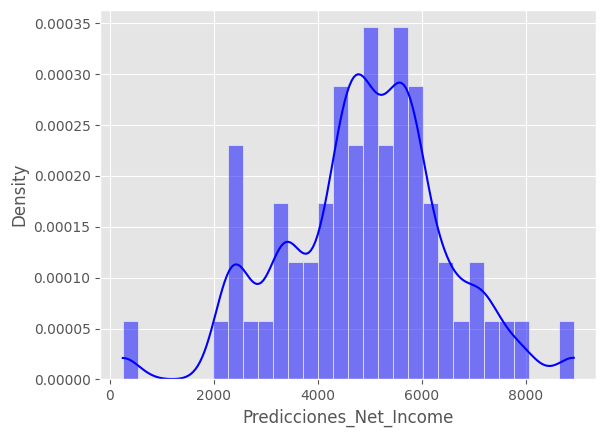

In [42]:
sns.histplot(data=data1['Predicciones_Net_Income'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='b', bins=30)

In [43]:
gaussian_kde(dataset=data, bw_method=0.13)

# Generamos numeros aleatorios con el metodo de Aceptación y Rechazo 

Generacion de datos aleatorios para Predicciones_Net_Income

In [44]:
# Suponiendo que 'data1' es tu DataFrame de pandas con una sola columna
data = data1['Predicciones_Net_Income']

# The grid we'll use for plotting
x_grid = np.linspace(data.min() - 1, data.max() + 1, 1000)

# Kernel density estimation
kde = gaussian_kde(dataset=data, bw_method=0.13)
pdf = kde.evaluate(x_grid)

# Función de aceptación y rechazo utilizando una función objetivo f
def f(x):
    return kde.evaluate([x])[0]

# Función de aceptación y rechazo
def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'
):
    X = np.zeros(N)
    i = 0
    while i < N:
        R1 = np.random.uniform(*Dom_f)
        R2 = np.random.rand(1)
        condicion = max_f * R2 <= f(R1)
        if condicion:
            X[i] = R1
            i += 1
    return X

N = 10000
Dom_f = (1000, 8000)
max_f = max(pdf)
Aleatorios = acep_rechazo_simplificada(N, Dom_f, f, max_f)
print(Aleatorios)

[5228.44986401 6511.37310154 3931.02443073 ... 4225.88353546 7555.73870354
 7650.10240934]


In [63]:
Aleatorios.shape

(10000,)

Generacion de valores aleatorios de predicciones interest income

In [46]:
data1

,Predicciones_Net_Income,Probabilidad,p_acumulada
1,6124,0.016667,0.016667
2,5375,0.016667,0.033333
3,5762,0.016667,0.050000
4,8927,0.016667,0.066667
5,7114,0.016667,0.083333
6,5571,0.016667,0.100000
7,5797,0.016667,0.116667
8,2269,0.016667,0.133333
9,4510,0.016667,0.150000
10,4718,0.016667,0.166667


In [47]:
data1 = copy['Predicciones_Net_Income']
data1 = data1.reset_index()
data1.index = range(1, len(data1) + 1) 
data1 = data1.drop(data1.columns[0], axis=1)
data1['Probabilidad'] = 1/60
data1['p_acumulada'] = data1['Probabilidad'].cumsum()
p = 1/len(data1['Probabilidad'])
p_acum = data1['p_acumulada'].tolist()
Predicciones_Net_Income = data1['Predicciones_Net_Income'].tolist()

# Seleccion de distribuciones que mejor se ajustan a los datos

In [48]:
import numpy as np
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import pandas as pd
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
#Transfomramos los datos con una normalizacion para poder realizar el histograma
data1_n=(data1+np.min(data1))/np.max(data1)
data1_n.pop('Probabilidad')
data1_n.pop('p_acumulada')
data1_n.head()

,Predicciones_Net_Income
1,0.686011
2,0.602108
3,0.645459
4,1.000002
5,0.796910


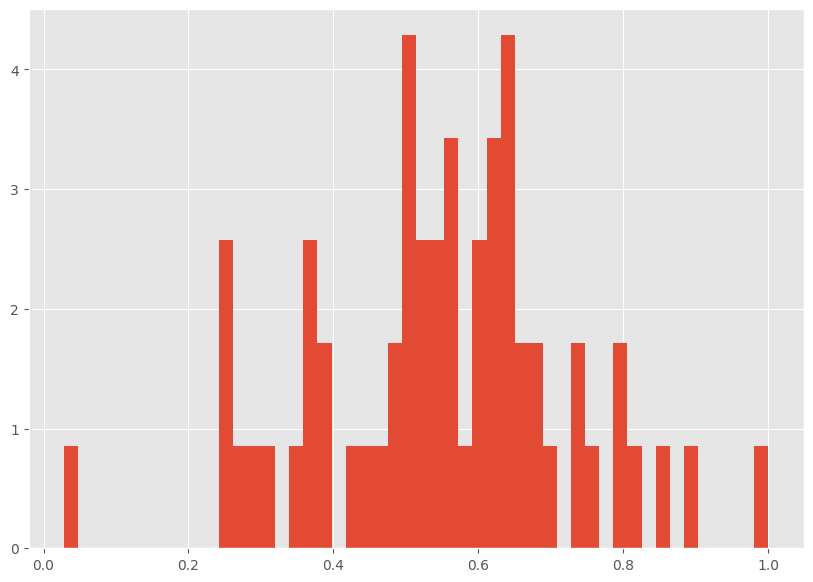

In [50]:
#Generamos una Y con la densidad de los datos, y una X con los bins
fig, ax = plt.subplots(1, 1, figsize=(10,7))

y, x, _ = ax.hist(data1_n, bins=50, density=True)

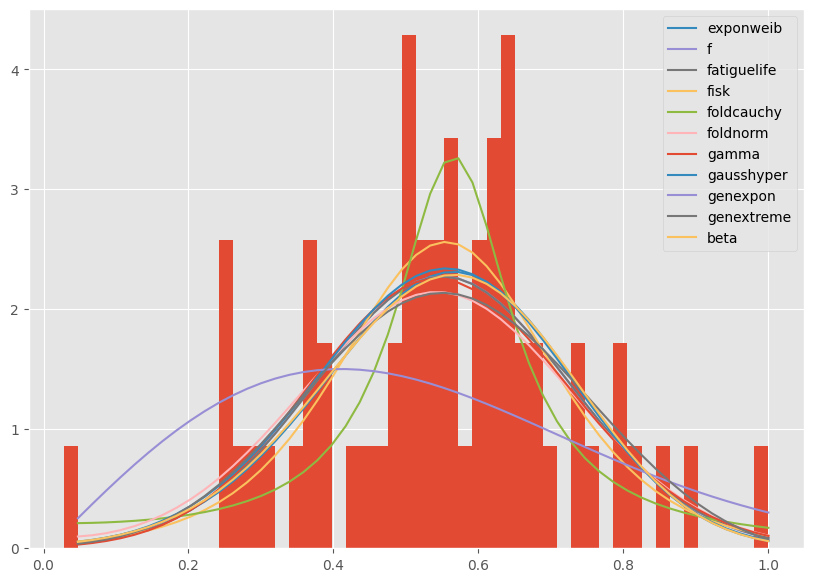

In [51]:
#Exploracion inicial para ver la distribucion que mas se ajusta, probamos solo con continuas
rv_continuas = [d_i for d_i in dir(st) if isinstance(getattr(st, d_i), getattr(st, 'rv_continuous'))]

fig, ax = plt.subplots(1, 1, figsize=(10,7))

y, x, _ = ax.hist(data1_n, bins=50, density=True)
x = x[1:]

error = pd.DataFrame(columns=['distribucion', 'error'])
i = 0
for d_i in rv_continuas[20:30] + ['beta']:
    try:
        params = getattr(st, d_i).fit(data1_n)
        data_hat = getattr(st, d_i).pdf(x, *params)
        ax.plot(x, data_hat, label=d_i)
        error.loc[i, :] = [d_i, np.mean((y - data_hat)**2)]
        i += 1
    except ValueError:
        pass

plt.legend()
error.set_index('distribucion', inplace=True)
error.sort_values('error', inplace=True)

In [52]:
#Revisamos cual tiene el menor error
error

,error
distribucion,
fisk,0.690114
foldcauchy,0.692116
exponweib,0.703443
beta,0.706442
gausshyper,0.716519
f,0.722705
fatiguelife,0.722723
gamma,0.734721
genextreme,0.742188


In [53]:
#Seleccoinamos las 3 distribucoines con menor eror
error.head(3).index.values

array(['fisk', 'foldcauchy', 'exponweib'], dtype=object)

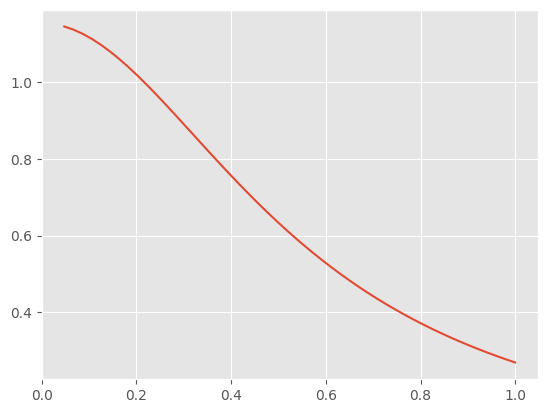

In [54]:
dist = 'foldcauchy'
params = getattr(st, dist).fit(y)
y_hat = getattr(st, dist).pdf(x, *params)
plt.plot(x, y_hat)

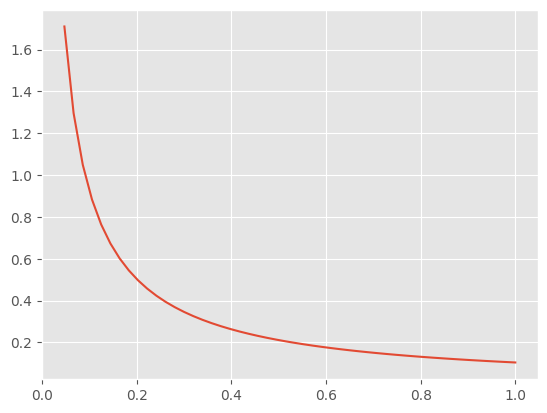

In [55]:
dist = 'fisk'
params = getattr(st, dist).fit(y)
y_hat = getattr(st, dist).pdf(x, *params)
plt.plot(x, y_hat)

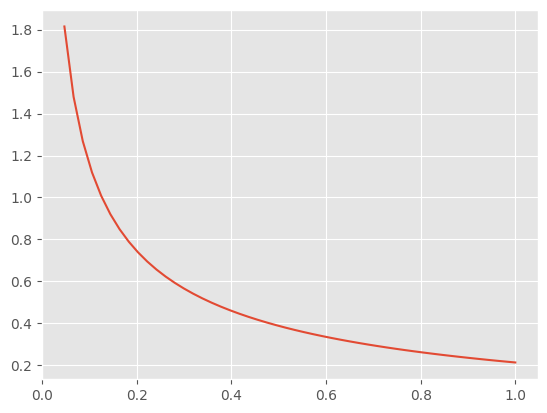

In [56]:
dist = 'exponweib'
params = getattr(st, dist).fit(y)
y_hat = getattr(st, dist).pdf(x, *params)
plt.plot(x, y_hat)

# Quantil Quantil de las mejor distribuciones

In [57]:
def calcular_qq_dist(dist, x, y):
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)
    
    params = getattr(st, dist).fit(y)
    y_hat = getattr(st, dist).pdf(x, *params)

    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probability')
    ax[0].grid()

    # gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
    # Usando scipy
    grap2 = st.probplot(y, dist=dist, sparams=params, plot=ax[1], fit=True)
    ax[1].grid()
    ax[1].set_title('Usando paquete scipy')

    #grap1 = sm.qqplot(y, dist=getattr(st, dist), line='q', fit=True, ax=ax[2])
    #ax[2].grid()
    #ax[2].set_title('Usando paquete stats')



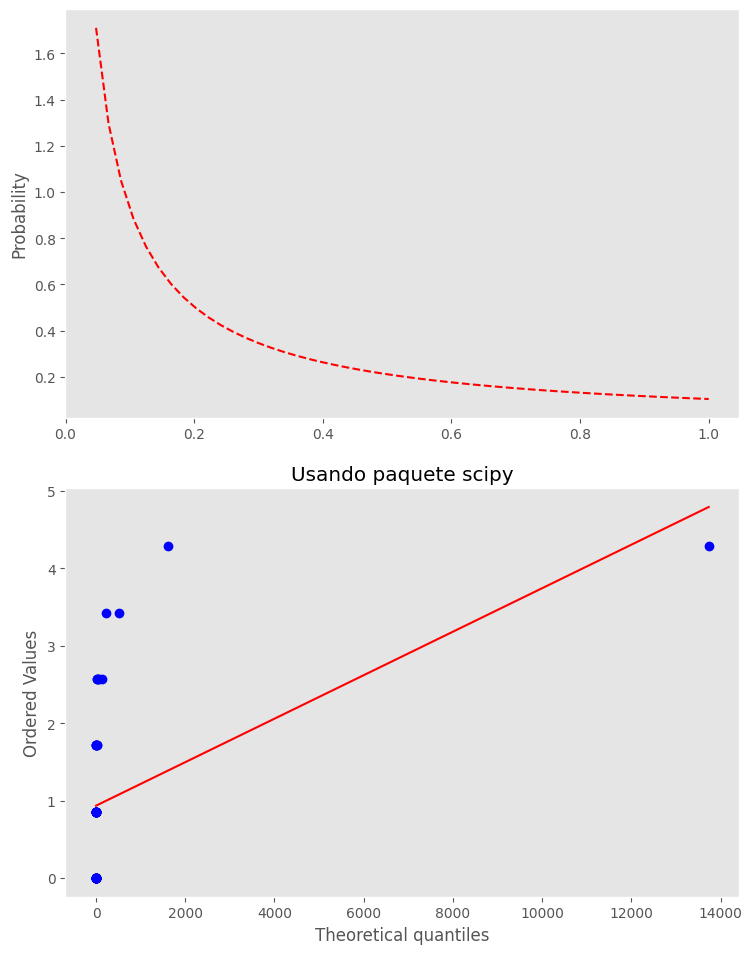

In [58]:
dist_calculadas = error.head(3).index.values
#'foldcauchy'
calcular_qq_dist(dist_calculadas[0], x, y)

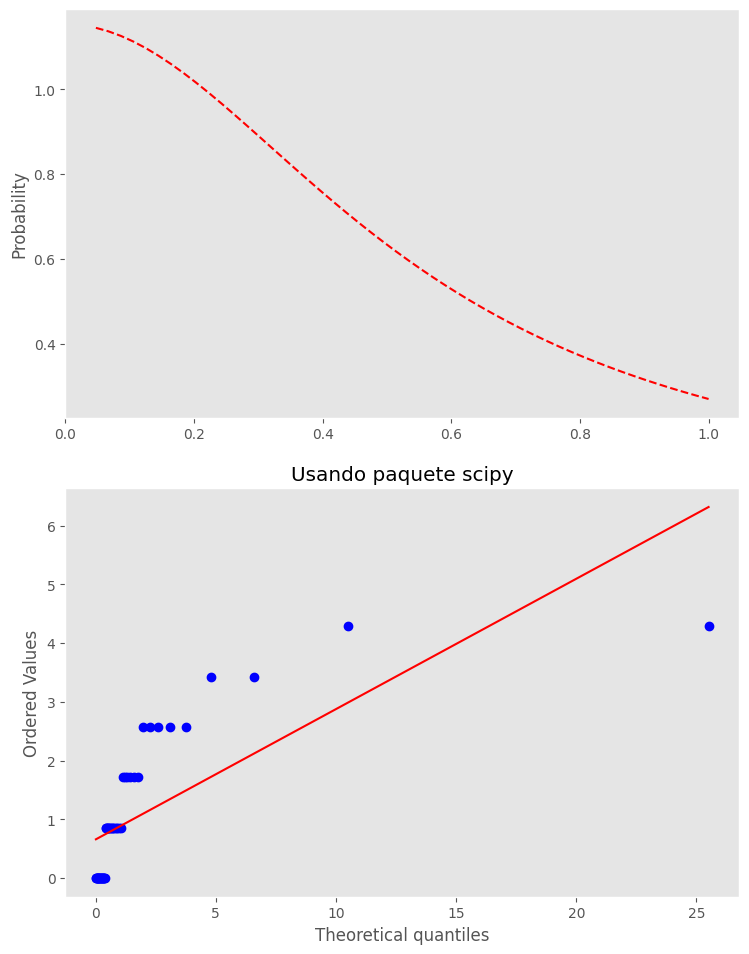

In [59]:
#'fisk'
calcular_qq_dist(dist_calculadas[1], x, y)

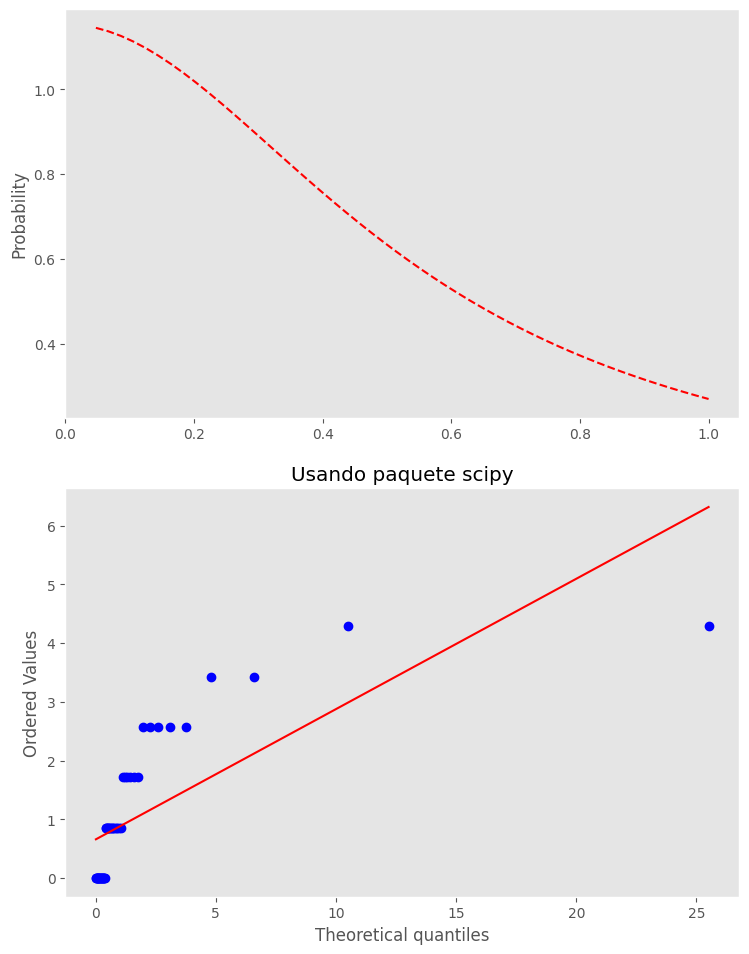

In [60]:
#'exponweib'
calcular_qq_dist(dist_calculadas[1], x, y)

## Que distribucion de ajusta mejor?


El analisis de errores y quantil quantil nos arroja que la distribucion de pobabilidad continua que mas se ajusta a los datos es la 'foldcauchy'.

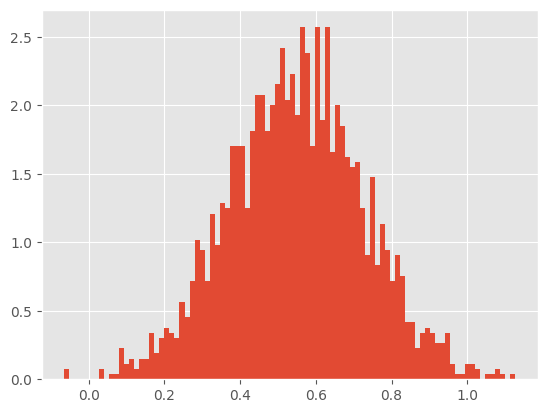

media mu =0.524585, desviación estándar muestral =0.343753


In [61]:
np.random.seed(555)
# Parámetros reales de la PDF
mu_real = np.mean(data1_n); sigma_real = np.std(data1_n)

# Cantidad de muestras
N = 2000
n1 = np.random.normal(mu_real, sigma_real, N)

J = 90  # Cantidad de particiones del histograma

y, x, _ = plt.hist(n1, J, density=True)
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

In [62]:
pi = st.norm.pdf(x, loc=mu, scale=sigma)
# pi = st.t.pdf(x, *st.t.fit(y))

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
# X2 = st.chisquare(y, Ei)
# print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  111.87714638683052
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  0.5245849605412739 
Desviación estándar muestral =  0.3437525773075786


# Simluaciones 

Funcion para generar variables discretas

Para graficar la distribucion

En esta parte ingresamos al dataframe datos referentes a la probabilidad, y la probabilidad acumulada para hacer calculos posteriores